In [1]:
#Instalo librerias
!pip install selenium
!pip install requests

In [29]:
#Importo libreraias
import requests
import bs4
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import re


In [36]:
#Investigamos el texto de las etiquetas porque no estamos pudiendo identificar cual nos sirve para descargar
#Defino Urls del pdf y nombro archivo
url_del_pdf = 'https://www.cafci.org.ar/index.html'
nombre_del_archivo = 'planilla_diariafcis.xls'

# Realizar la solicitud HTTP
response = requests.get(url_del_pdf)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Utilizar BeautifulSoup para analizar el HTML de la página
    soup = BeautifulSoup(response.text, 'html.parser')

    # Buscar todas las etiquetas <a> (enlaces) y mostrar sus atributos
    for enlace in soup.find_all('a'):
        print(enlace)
else:
    print(f'Error al acceder a la página web.Código de estado: {response.status_code}')

<a class="linkHome" href="index.html">
                Home
            </a>
<a class="aprendaColortxt" href="#" ng-init="aprendaMenu=false;" ng-mouseleave="aprendaMenu=false;" ng-mouseover="aprendaMenu=true;">
                Aprenda sobre Fondos
            </a>
<a class="encuentreColortxt" href="#" ng-init="encuentreMenu=false;" ng-mouseleave="encuentreMenu=false;" ng-mouseover="encuentreMenu=true;">
                Encuentre su Fondo
            </a>
<a class="cafciColortxt" href="#" ng-init="cafciMenu=false;" ng-mouseleave="cafciMenu=false;" ng-mouseover="cafciMenu=true;">
                Acerca de la CAFCI
            </a>
<a href="aprenda-sobre-fondos.html">Â¿QuÃ© es un Fondo ComÃºn de InversiÃ³n?</a>
<a href="conceptos-basicos.html">Conceptos BÃ¡sicos</a>
<a href="glosario.html">Glosario</a>
<a href="consulta-de-fondos.html">Consulta de Fondos</a>
<a href="comparador-de-fondos.html">Comparador de Fondos</a>
<a href="estadisticas.html">EstadÃ­sticas</a>
<a href="asociadas.html">

In [40]:
#Ahora si retomamos para ver si usando 'descargar' podemos obtener el archivo
# Realizar la solicitud HTTP
url_del_pdf = 'https://www.cafci.org.ar/index.html'
response = requests.get(url_del_pdf)
nombre_del_archivo = 'planilla_diariafcis.xls'

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Utilizar BeautifulSoup para analizar el HTML de la página
    soup = BeautifulSoup(response.text, 'html.parser')

    # Buscar el enlace que contiene la palabra "Descargar"
    patron_descarga = re.compile(r'Descargar', re.IGNORECASE)
    enlace_descarga = soup.find('a', text=patron_descarga)

    if enlace_descarga:
        # Tomar el enlace encontrado
        url_del_pdf = enlace_descarga['href']
        # Agregar un mensaje de impresión
        print(f'El archivo ha sido descargado con éxito desde: {url_del_pdf}')

        # Resto del código para descargar el archivo y trabajar con él...
    else:
        print('No se encontró un enlace con la palabra "Descargar".')
else:
    print(f'Error al acceder a la página web. Código de estado: {response.status_code}')

El archivo ha sido descargado con éxito desde: https://api.cafci.org.ar/pb_get


In [41]:
#Ahora que tengo el archivo descargado voy a definir que fondos quiero analizar creando un diccionario.
fcis_avsa = ["Balanz Capital Ahorro - Clase A", "Balanz Capital Renta Fija - Clase A", "SBS Estrategia - Clase A","SBS Acciones Argentina - Clase A","Gainvest Pesos - Clase A","Gainvest Balanceado - Clase A","Gainvest Global I - Clase A","Compass Best Ideas - Clase A"]  # Reemplaza con tus valores reales


In [45]:
#Abro el archivo y defino mi dataframe
archivo_excel = r'C:/Users/Lenovo/Downloads/20240115_Planilla_Diaria_A.xlsx'
datos = pd.read_excel(archivo_excel, engine='openpyxl')

In [60]:
#El archivo tiene un fomrato complicado para trabajarlo vamos  abrrirlo saltando algunas filas y encabezados
datos = pd.read_excel(archivo_excel, engine='openpyxl', header=None, skiprows=11)


In [61]:
#Vemos como quedo lo nuestro
datos

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,Gainvest Renta Variable - Clase A,ARS,Arg,Flex,15/01/24,246496.973,242226.052,1.763,246496.973,16.119,...,0.0,N,ARS,2.0,N,NaN,NaN,No aplicable,N,1.0
1,Gainvest Renta Variable - Clase B,ARS,Arg,Flex,15/01/24,13397.379,13164.709,1.767,13397.379,16.146,...,0.0,N,ARS,2.0,N,NaN,NaN,No aplicable,N,1.0
2,Gainvest Renta Variable - Clase C,ARS,Arg,Flex,15/01/24,1000,1000.000,0.000,1000.000,0.000,...,0.0,N,ARS,2.0,N,NaN,NaN,No aplicable,N,1.0
3,MAF Acciones Argentinas - Clase A,ARS,Arg,Flex,15/01/24,335414.363,333043.283,0.712,335414.363,11.749,...,0.0,N,ARS,2.0,N,NaN,NaN,No aplicable,N,2000.0
4,MAF Acciones Argentinas - Clase B,ARS,Arg,Flex,15/01/24,335414.369,333043.288,0.712,335414.369,11.749,...,0.0,N,ARS,2.0,N,NaN,NaN,No aplicable,N,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,"(*) Determinación del valor de la cuotaparte, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2694,(**) Liquidez sujeta a reprogramacion BCRA.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2695,(***) Pago en especies previa autorizacion de ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2696,P/E Pago en especies.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#Previo a eliminar valores nulos elimino variables que no considero utiles
col_r = datos.columns[24:]


In [79]:
#Elimino columnas
datos_limpio = datos.drop(columns=col_r)

In [80]:
#Vemos como quedo lo nuestro
datos_limpio

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Gainvest Renta Variable - Clase A,ARS,Arg,Flex,15/01/24,246496.973,242226.052,1.763,246496.973,16.119,...,3.969106e+08,3.892895e+08,0.056,Banco Comafi S.A.,651.0,EF-3,1031.0,311.0,115.0,StoneX Asset Management S.A.
1,Gainvest Renta Variable - Clase B,ARS,Arg,Flex,15/01/24,13397.379,13164.709,1.767,13397.379,16.146,...,6.088727e+09,5.982985e+09,0.856,Banco Comafi S.A.,651.0,EF-3,3685.0,311.0,115.0,StoneX Asset Management S.A.
2,Gainvest Renta Variable - Clase C,ARS,Arg,Flex,15/01/24,1000,1000.000,0.000,1000.000,0.000,...,0.000000e+00,0.000000e+00,0,Banco Comafi S.A.,651.0,EF-3,3686.0,311.0,115.0,StoneX Asset Management S.A.
3,MAF Acciones Argentinas - Clase A,ARS,Arg,Flex,15/01/24,335414.363,333043.283,0.712,335414.363,11.749,...,6.285051e+08,6.236877e+08,0.088,Banco Mariva S.A.,635.0,A- (Arg),2477.0,371.0,436.0,Mariva Asset Management S.A.U.S.G.F.C.I.
4,MAF Acciones Argentinas - Clase B,ARS,Arg,Flex,15/01/24,335414.369,333043.288,0.712,335414.369,11.749,...,1.989759e+09,1.975694e+09,0.28,Banco Mariva S.A.,635.0,A- (Arg),1021.0,371.0,436.0,Mariva Asset Management S.A.U.S.G.F.C.I.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,"(*) Determinación del valor de la cuotaparte, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2694,(**) Liquidez sujeta a reprogramacion BCRA.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2695,(***) Pago en especies previa autorizacion de ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2696,P/E Pago en especies.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#Ahora si el momento de borrar nulls
# Eliminar filas con valores nulos
datos_sin_nulos = datos_limpio.dropna()

In [82]:
#Reviso a ver que tal quedo
datos_sin_nulos

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Gainvest Renta Variable - Clase A,ARS,Arg,Flex,15/01/24,246496.973,242226.052,1.763,246496.973,16.119,...,3.969106e+08,3.892895e+08,0.056,Banco Comafi S.A.,651.0,EF-3,1031.0,311.0,115.0,StoneX Asset Management S.A.
1,Gainvest Renta Variable - Clase B,ARS,Arg,Flex,15/01/24,13397.379,13164.709,1.767,13397.379,16.146,...,6.088727e+09,5.982985e+09,0.856,Banco Comafi S.A.,651.0,EF-3,3685.0,311.0,115.0,StoneX Asset Management S.A.
2,Gainvest Renta Variable - Clase C,ARS,Arg,Flex,15/01/24,1000,1000.000,0.000,1000.000,0.000,...,0.000000e+00,0.000000e+00,0,Banco Comafi S.A.,651.0,EF-3,3686.0,311.0,115.0,StoneX Asset Management S.A.
3,MAF Acciones Argentinas - Clase A,ARS,Arg,Flex,15/01/24,335414.363,333043.283,0.712,335414.363,11.749,...,6.285051e+08,6.236877e+08,0.088,Banco Mariva S.A.,635.0,A- (Arg),2477.0,371.0,436.0,Mariva Asset Management S.A.U.S.G.F.C.I.
4,MAF Acciones Argentinas - Clase B,ARS,Arg,Flex,15/01/24,335414.369,333043.288,0.712,335414.369,11.749,...,1.989759e+09,1.975694e+09,0.28,Banco Mariva S.A.,635.0,A- (Arg),1021.0,371.0,436.0,Mariva Asset Management S.A.U.S.G.F.C.I.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,Lombard Ahorro,ARS,Arg,Cor,15/01/24,39323.154,39144.488,0.456,39323.154,3.738,...,4.356738e+07,4.336943e+07,55.991,Banco Patagonia S.A.,247.0,SIN CALIFICACION,577.0,17.0,209.0,Patagonia Inversora S.A.S.G.F.C.I
2681,Cohen Cobertura - Clase A,ARS,Arg,Med,15/01/24,15007.951,15007.951,0.000,15007.951,0.000,...,1.130333e+05,1.130333e+05,100,Banco Comafi S.A.,740.0,A- (arg) f,1198.0,359.0,115.0,Cohen S.A.
2682,Cohen Cobertura - Clase B,ARS,Arg,Med,15/01/24,15805.664,15805.664,0.000,15805.664,0.000,...,0.000000e+00,0.000000e+00,0,Banco Comafi S.A.,740.0,A- (arg) f,1199.0,359.0,115.0,Cohen S.A.
2683,Cohen Cobertura - Clase C,USD,Arg,Med,15/01/24,728.674,728.674,0.000,93139.143,0.000,...,0.000000e+00,0.000000e+00,0,Banco Comafi S.A.,740.0,A- (arg) f,1952.0,359.0,115.0,Cohen S.A.


In [83]:
#Ahora tengo como les asigno nombre a estas columnas
nombres_columnas = ['Nombre','Moneda', 'Región','Horizonte','Fecha', 'VCT0', 'VCT-1', 'Var%', 'Reexp.Pesos', 'VarCt-15', 'VarCt-15', 'VarCanual', 'QC', 'QC-1', 'PN0', 'PNt-1','MS','SD','CNV','CAL','CODCAF','CSG','CSD','SD']

# Asigno los nombres a las columnas del DataFrame
datos_sin_nulos.columns = nombres_columnas

In [84]:
#Vemos como quedo lo nuestro
datos_sin_nulos

,Nombre,Moneda,Región,Horizonte,Fecha,VCT0,VCT-1,Var%,Reexp.Pesos,VarCt-15,...,PN0,PNt-1,MS,SD,CNV,CAL,CODCAF,CSG,CSD,SD
0,Gainvest Renta Variable - Clase A,ARS,Arg,Flex,15/01/24,246496.973,242226.052,1.763,246496.973,16.119,...,3.969106e+08,3.892895e+08,0.056,Banco Comafi S.A.,651.0,EF-3,1031.0,311.0,115.0,StoneX Asset Management S.A.
1,Gainvest Renta Variable - Clase B,ARS,Arg,Flex,15/01/24,13397.379,13164.709,1.767,13397.379,16.146,...,6.088727e+09,5.982985e+09,0.856,Banco Comafi S.A.,651.0,EF-3,3685.0,311.0,115.0,StoneX Asset Management S.A.
2,Gainvest Renta Variable - Clase C,ARS,Arg,Flex,15/01/24,1000,1000.000,0.000,1000.000,0.000,...,0.000000e+00,0.000000e+00,0,Banco Comafi S.A.,651.0,EF-3,3686.0,311.0,115.0,StoneX Asset Management S.A.
3,MAF Acciones Argentinas - Clase A,ARS,Arg,Flex,15/01/24,335414.363,333043.283,0.712,335414.363,11.749,...,6.285051e+08,6.236877e+08,0.088,Banco Mariva S.A.,635.0,A- (Arg),2477.0,371.0,436.0,Mariva Asset Management S.A.U.S.G.F.C.I.
4,MAF Acciones Argentinas - Clase B,ARS,Arg,Flex,15/01/24,335414.369,333043.288,0.712,335414.369,11.749,...,1.989759e+09,1.975694e+09,0.28,Banco Mariva S.A.,635.0,A- (Arg),1021.0,371.0,436.0,Mariva Asset Management S.A.U.S.G.F.C.I.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,Lombard Ahorro,ARS,Arg,Cor,15/01/24,39323.154,39144.488,0.456,39323.154,3.738,...,4.356738e+07,4.336943e+07,55.991,Banco Patagonia S.A.,247.0,SIN CALIFICACION,577.0,17.0,209.0,Patagonia Inversora S.A.S.G.F.C.I
2681,Cohen Cobertura - Clase A,ARS,Arg,Med,15/01/24,15007.951,15007.951,0.000,15007.951,0.000,...,1.130333e+05,1.130333e+05,100,Banco Comafi S.A.,740.0,A- (arg) f,1198.0,359.0,115.0,Cohen S.A.
2682,Cohen Cobertura - Clase B,ARS,Arg,Med,15/01/24,15805.664,15805.664,0.000,15805.664,0.000,...,0.000000e+00,0.000000e+00,0,Banco Comafi S.A.,740.0,A- (arg) f,1199.0,359.0,115.0,Cohen S.A.
2683,Cohen Cobertura - Clase C,USD,Arg,Med,15/01/24,728.674,728.674,0.000,93139.143,0.000,...,0.000000e+00,0.000000e+00,0,Banco Comafi S.A.,740.0,A- (arg) f,1952.0,359.0,115.0,Cohen S.A.


In [85]:
#Ahora tenemos nuestro dataframe armado , podemos analizar los fondos que ofrece suscribir avsa
fcis_avsa = ["Balanz Capital Ahorro - Clase A", "Balanz Capital Renta Fija - Clase A", "SBS Estrategia - Clase A","SBS Acciones Argentina - Clase A","Gainvest Pesos - Clase A","Gainvest Balanceado - Clase A","Gainvest Global I - Clase A","Compass Best Ideas - Clase A"]  # Reemplaza con tus valores reales


In [86]:
#Filtramos por fila
fcis_avsa = datos_sin_nulos.loc[datos_sin_nulos['Nombre'].isin(fcis_avsa)]


In [87]:
#Vemos como quedo lo nuestro
fcis_avsa

,Nombre,Moneda,Región,Horizonte,Fecha,VCT0,VCT-1,Var%,Reexp.Pesos,VarCt-15,...,PN0,PNt-1,MS,SD,CNV,CAL,CODCAF,CSG,CSD,SD
125,SBS Acciones Argentina - Clase A,ARS,Arg,Lar,15/01/24,627346.084,620910.969,1.036,627346.084,11.616,...,7.202711e+09,7.150938e+09,1.013,Banco de Valores S.A.,576.0,A,820.0,347.0,65.0,SBS Asset Management S.A.S.G.F.C.I.
269,Balanz Capital Ahorro - Clase A,ARS,Arg,Cor,15/01/24,80425.931,80302.232,0.154,80425.931,6.129,...,2.089252e+10,2.098519e+10,0.267,Banco de Valores S.A.,684.0,AAf(arg),1114.0,372.0,65.0,Balanz S.G.F.C.I.S.A.U.
526,Balanz Capital Renta Fija - Clase A,ARS,Arg,Flex,15/01/24,137021.885,136037.602,0.724,137021.885,10.902,...,4.807642e+10,4.745773e+10,0.614,Banco de Valores S.A.,638.0,AA-f(arg),1006.0,372.0,65.0,Balanz S.G.F.C.I.S.A.U.
1023,SBS Estrategia - Clase A,ARS,Arg,Med,15/01/24,29346.211,29052.067,1.012,29346.211,10.541,...,4.828134e+09,4.774170e+09,0.062,Banco de Valores S.A.,610.0,Af,926.0,347.0,65.0,SBS Asset Management S.A.S.G.F.C.I.
1454,Gainvest Global I - Clase A,USD,Latam,Cor,15/01/24,1072.818,1075.594,-0.258,877994.239,-0.181,...,2.010032e+06,2.013779e+06,0.204,Banco de Valores S.A.,920.0,AAAf.ar,2369.0,311.0,65.0,StoneX Asset Management S.A.
1625,Gainvest Balanceado - Clase A,ARS,Arg,Flex,15/01/24,182657.633,181991.673,0.366,182657.633,5.895,...,2.742855e+09,2.724851e+09,0.144,Banco Comafi S.A.,679.0,EF-3,1103.0,311.0,115.0,StoneX Asset Management S.A.
2607,Gainvest Pesos - Clase A,ARS,Arg,Med,15/01/24,17645.315,17521.137,0.709,17645.315,4.092,...,6.325509e+08,6.253382e+08,0.004,Banco Comafi S.A.,784.0,AAf.ar,3945.0,311.0,115.0,StoneX Asset Management S.A.


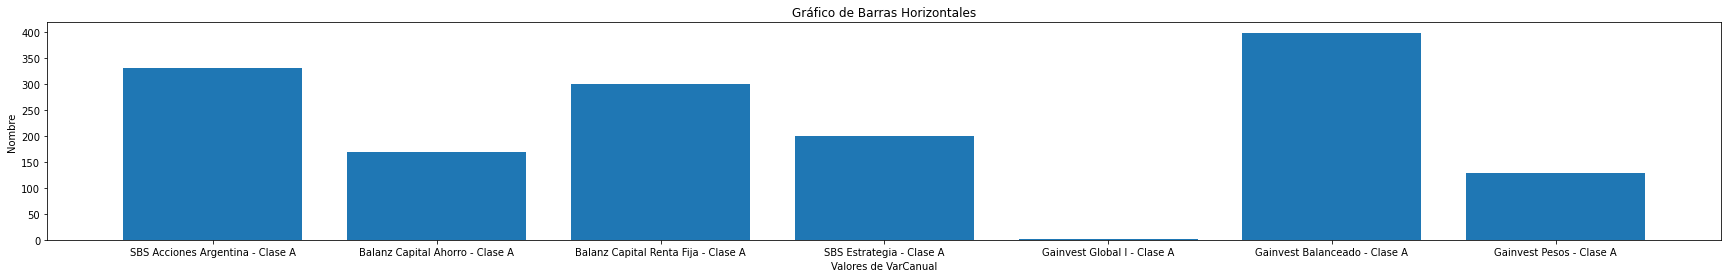

In [99]:
# Graficamos barras horizontales
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 4))

plt.bar(fcis_avsa['Nombre'],fcis_avsa['VarCanual'])

# Personalizamos el gráfico
plt.xlabel('Valores de VarCanual')
plt.ylabel('Nombre')
plt.title('Gráfico de Barras Horizontales')

# Mostramos el gráfico
plt.show()

In [100]:
#Ahora descargamos ela rchivo manipulado en un csv
fcis_avsa.to_csv('archivo_manipulado.csv', index=False)
